<a href="https://colab.research.google.com/github/ChardyBalla/Chardy/blob/main/Copy_of_Data_Visualizations_with_Python_Matplotlib_Chart_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualizations with Python: Matplotlib Chart Types

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this notebook, we aim to learn the following:
1. Install and utilize the `matplotlib` package for visualizing data
2. Create basic chart types with `matplotlib`
  1. Line Chart
  1. Bar Charts
  1. Scatter Chart

## The Matplotlib Package

**[Matplotlib](https://matplotlib.org)** is one of the most commonly used libraries for creating visualizations with python.

- It is usually pre-installed with different python environments (e.g. anaconda, google colab)
- Can be installed with pip: `pip install matplotlib`

## Imports and Data Preparation

We first import the pyplot module from matplotlib:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We also do `%matplotlib inline` for notebook sessions such as this. This line makes matplotlib render the charts as static visualizations within the notebook.


Let's work with the employee attrition dataset from the previous lessons.

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Refocus Module/Jupyter Notebook-20230501T012835Z-001/Jupyter Notebook/datasets/hr_employee_attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DepartmentInCompany,DistanceHome,Education,Educ,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,2,...,3,1,80,8,0,1,6,4,0,5
1,-49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,2,3,...,4,4,80,10,3,3,10,7,1,7
2,1,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,4,4,...,3,2,80,7,3,3,0,0,0,0
3,2,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,5,4,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,7,1,...,3,4,80,6,3,3,2,2,2,2


Remove the outliers based on daily rate (those with daily rates greater than 10,000) for our visualization examples.

In [6]:
df = df[df.DailyRate<1e4]

## Line Charts

Line charts are most commonly used to plot continuous data. Because the points are physically connected with a line, it implies a connection between the points which may not make sense for categorical data.

We can create plots with matplotlib using its plot function or through pandas.

Let's plot the average daily rate vs. the total working years.

In [7]:
df_rate_per_working_year = df.groupby('TotalWorkingYears').DailyRate.mean()
df_rate_per_working_year.head()

TotalWorkingYears
0    667.545455
1    806.444444
2    719.870968
3    812.285714
4    721.209677
Name: DailyRate, dtype: float64

<Axes: xlabel='TotalWorkingYears'>

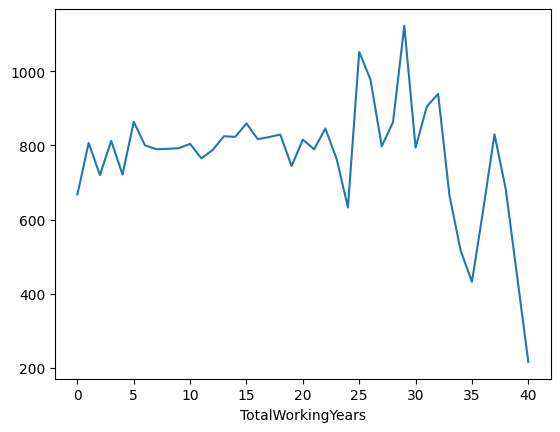

In [8]:
df_rate_per_working_year.plot()

With the pandas approach, we can create line plots with a pandas series using the `.plot()` method. A line plot will be created by default (no input parameters).

In this case, the index (TotalWorkingYears) is our x-axis and the values (Average DailyRate) is in the y-axis.


With the matplotlib approach, we do `plt.plot()`

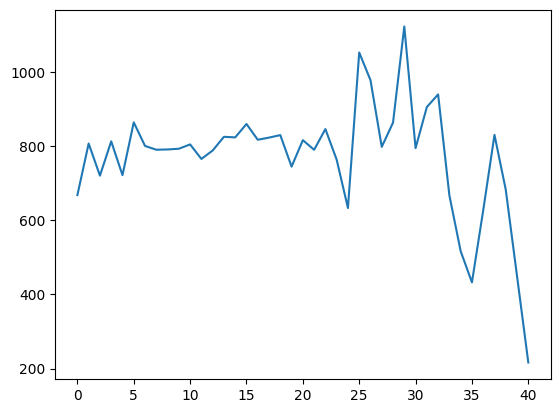

In [9]:
plt.plot(df_rate_per_working_year)

## Bar Charts

Bar charts is a familiar or common chart when looking at visualizations. This is an advantage as this means less of a learning curve for your audience.

Bar charts are easy to read. Our eyes compared the end points of the bars which makes it easy to see which category is the biggest or smallest, or even the difference between categories.



### Single Series

Let's plot the average daily rate per educ

**Vertical Bar Charts**

In [10]:
df_rate_per_educ = df.groupby('Educ').DailyRate.mean()
df_rate_per_educ.head()

Educ
Human Resources    675.259259
Life Sciences      800.597293
Marketing          724.949045
Medical            825.342857
Medicall           607.333333
Name: DailyRate, dtype: float64

Bar Charts can be generated in pandas by adding the `kind='bar'` parameter. 

<Axes: xlabel='Educ'>

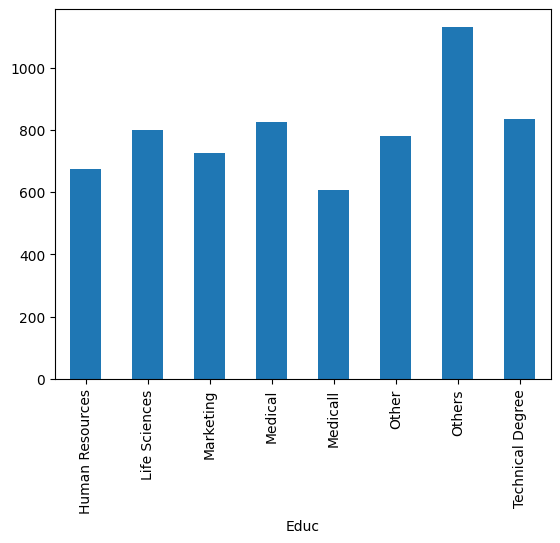

In [11]:
df_rate_per_educ.plot(kind='bar')

In matplotlib, we use `plt.bar`

<BarContainer object of 8 artists>

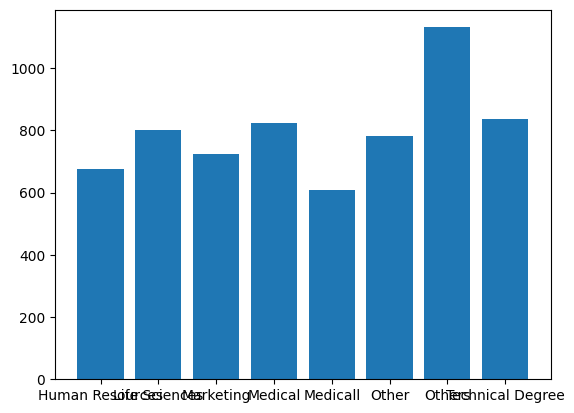

In [12]:
# we use the parameter x, pertaining to the categories
# on the other hand, we use height for the category values
plt.bar(x=df_rate_per_educ.index, height=df_rate_per_educ.values)

**Horizontal Bar Charts**

In cases where the category names are too long, horizontal bar charts makes them easier to read.

With pandas, we use `kind='barh'`

<Axes: ylabel='Educ'>

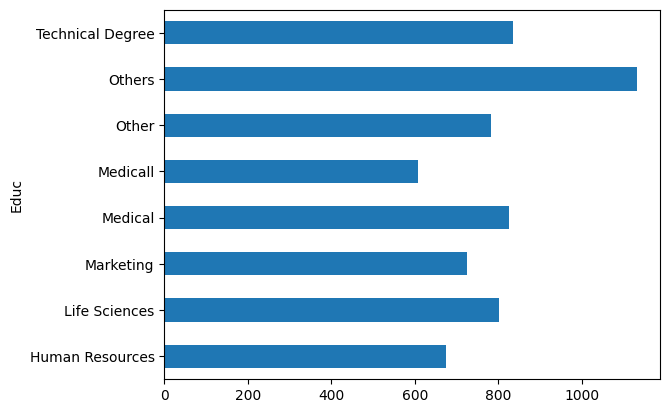

In [13]:
df_rate_per_educ.plot(kind='barh')

With matplotlib, we use `plt.barh`

<BarContainer object of 8 artists>

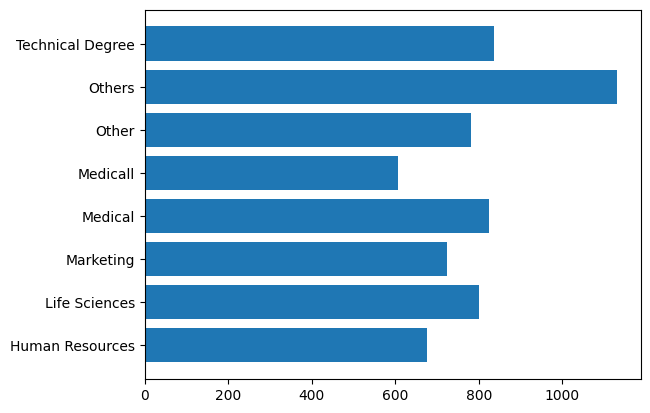

In [14]:
# instead of x, we use y since the categories are vertical
# also, we use width, instead of height since the values are horizontal
plt.barh(y=df_rate_per_educ.index, width=df_rate_per_educ.values)

### Multiple Series

Plot the number of attrition per department

In [15]:
df_attrition_per_dept = df.groupby(['DepartmentInCompany', 'Attrition']).size()
df_attrition_per_dept.head()

DepartmentInCompany     Attrition
Human Resources         No            53
                        Yes           12
Research & Development  No           819
                        Yes          132
Sales                   No           353
dtype: int64

In [16]:
# we need to set it up such the the attrition values are in the columns
# use the unstack function
df_attrition_per_dept = df_attrition_per_dept.unstack()
df_attrition_per_dept.head()

Attrition,No,Yes
DepartmentInCompany,,
Human Resources,53.0,12.0
Research & Development,819.0,132.0
Sales,353.0,91.0
none,3.0,NaN


**Vertical Bar Chart**

As long as the pandas dataframe uses the 1st column as the index and the 2nd column values (Attrition Yes/No) as its columns, the plot function will create a bar for each condition. 

<Axes: xlabel='DepartmentInCompany'>

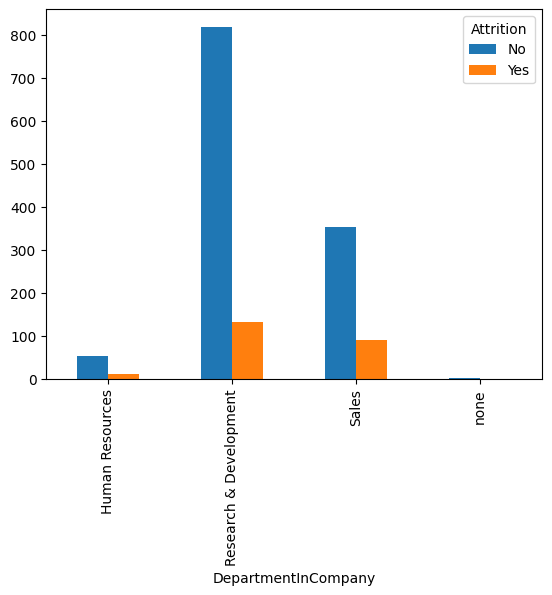

In [17]:
df_attrition_per_dept.plot(kind='bar')

We can also stack the bars instead. Use the `stacked=True` parameter

<Axes: xlabel='DepartmentInCompany'>

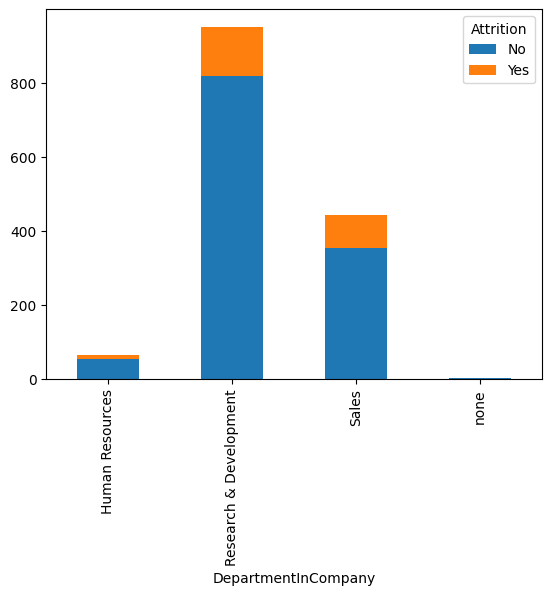

In [18]:
df_attrition_per_dept.plot(kind='bar', stacked=True)

**Horizontal Bar Chart**

use `kind='barh'` with the same dataframe to get a horizontal bar for each category.

<Axes: ylabel='DepartmentInCompany'>

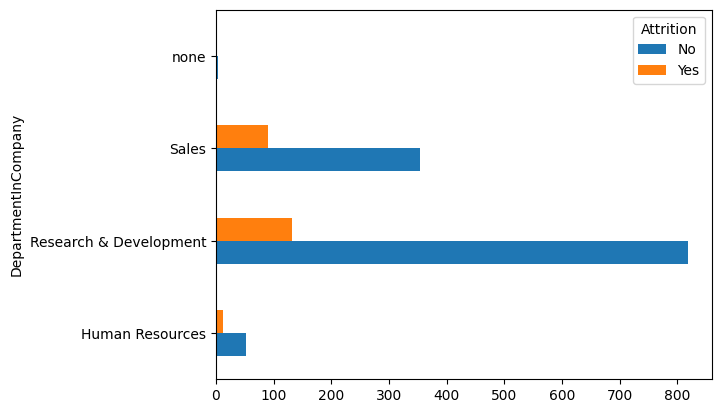

In [19]:
df_attrition_per_dept.plot(kind='barh')

Similarly, you can also stack the bars using the `stacked=True` parameter

<Axes: ylabel='DepartmentInCompany'>

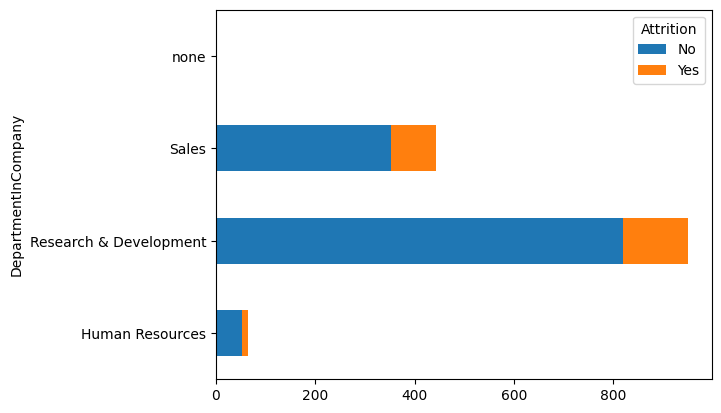

In [20]:
df_attrition_per_dept.plot(kind='barh', stacked=True)

## Scatter Chart

Scatter charts are more common for cases where we are looking for correlations between different variables.

Plot the correlation between the Total Working Years and Years at Company

In pandas, we use `kind='scatter'` and input and x and y parameter corresponding to the column names we need to plot

<Axes: xlabel='TotalWorkingYears', ylabel='YearsAtCompany'>

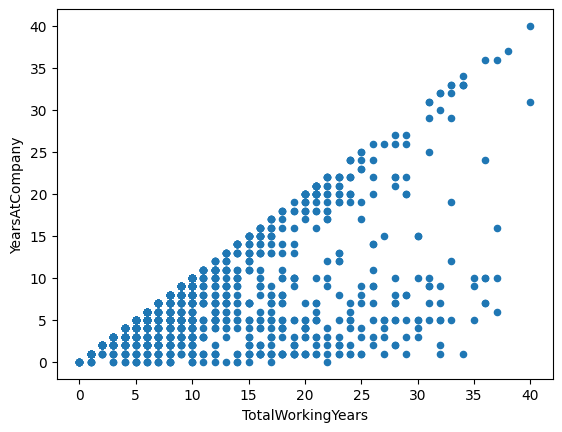

In [21]:
df.plot(kind='scatter', x='TotalWorkingYears', y='YearsAtCompany')

In matplotlib, we use `plt.scatter` with the same x and y parameters

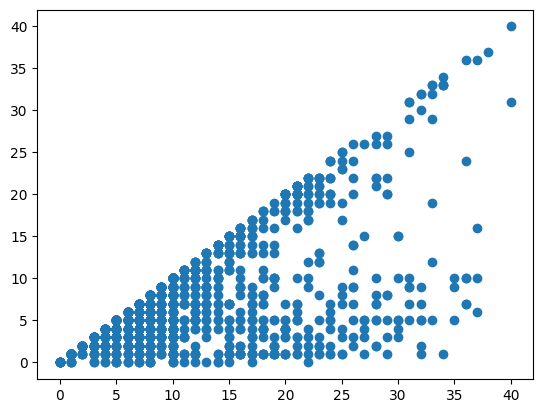

In [22]:
plt.scatter(x=df['TotalWorkingYears'], y=df['YearsAtCompany'])

In the next notebook, we will learn how to customize this basic charts.